### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

### Importing train and test datasets

In [2]:
df = pd.read_csv('train.csv')
tdf = pd.read_csv('test.csv')

In [3]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
df.shape

(82657, 12)

In [5]:
tdf.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [6]:
tdf.shape

(20665, 11)

### Cleaning the datasets

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [8]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           15927 non-null  object 
 1   country             20661 non-null  object 
 2   review_title        20665 non-null  object 
 3   review_description  20665 non-null  object 
 4   designation         14676 non-null  object 
 5   points              20665 non-null  int64  
 6   price               19271 non-null  float64
 7   province            20661 non-null  object 
 8   region_1            17351 non-null  object 
 9   region_2            8914 non-null   object 
 10  winery              20665 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


* Dropping 'user_name' column because they are of no use
* Dropping 'designation' column because there are very large number of missing rows in this column, also its contents are available in 'review_title' and 'review_description' columns.
* Dropping columns 'region_1' and 'region_2' because their contents are available in 'review_title' and 'review_description' columns.

In [9]:
df.drop(columns=['user_name','designation','region_1','region_2'],inplace=True)
tdf.drop(columns=['user_name','designation','region_1','region_2'],inplace=True)

In [10]:
df.head()

,country,review_title,review_description,points,price,province,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,Australia Other,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,Washington,North by Northwest,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,Piedmont,Renato Ratti,Nebbiolo
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,France Other,Château du Cèdre,Malbec


### Handling NaN values in columns

In [11]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             20661 non-null  object 
 1   review_title        20665 non-null  object 
 2   review_description  20665 non-null  object 
 3   points              20665 non-null  int64  
 4   price               19271 non-null  float64
 5   province            20661 non-null  object 
 6   winery              20665 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             82622 non-null  object 
 1   review_title        82657 non-null  object 
 2   review_description  82657 non-null  object 
 3   points              82657 non-null  int64  
 4   price               77088 non-null  float64
 5   province            82622 non-null  object 
 6   winery              82657 non-null  object 
 7   variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.0+ MB


From info we can see that 'country', 'price' and 'province' columns contains NaN values. 

##### Handling 'country' column

Since 'country' column is categorical column, so I will fill NaN values with mode of the country column.

In [13]:
df[['country']].isna().any()

country    True
dtype: bool

In [14]:
df[['country']] = df[['country']].fillna(value = df['country'].mode()[0])
tdf[['country']] = tdf[['country']].fillna(value = tdf['country'].mode()[0])

##### Handling 'price' column

In [15]:
df['price'].value_counts()

20.0      4206
15.0      3627
25.0      3596
30.0      3127
18.0      2886
          ... 
1125.0       1
448.0        1
238.0        1
428.0        1
281.0        1
Name: price, Length: 351, dtype: int64

##### Checking for outliers in 'price' column

In [16]:
df[df['price']>100].count()

country               2379
review_title          2379
review_description    2379
points                2379
price                 2379
province              2379
winery                2379
variety               2379
dtype: int64

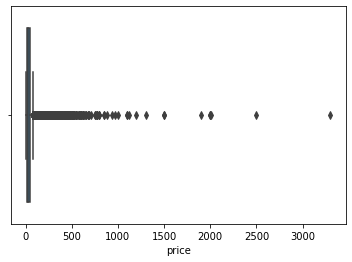

In [17]:
sns.boxplot(df['price'])

Dropping all the rows which have value greater than 100 in 'price' column.

In [18]:
df.drop(df[df['price']>100].index,inplace = True)

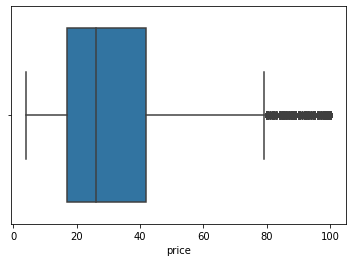

In [19]:
sns.boxplot(df['price'])

In [20]:
df['price'].value_counts()

20.0    4206
15.0    3627
25.0    3596
30.0    3127
18.0    2886
        ... 
83.0      17
71.0      15
81.0      14
91.0       9
4.0        6
Name: price, Length: 97, dtype: int64

In [21]:
df.shape

(80278, 8)

In [22]:
print(df.price.isna().any())
df.price.value_counts().sum()

True


74709

* Replacing NaN values in 'price' column with its mean value

In [23]:
df[['price']] = df[['price']].fillna(value = int(df['price'].mean()))
tdf[['price']] = tdf[['price']].fillna(value = int(tdf['price'].mean()))

In [24]:
df.price.value_counts().sum()

80278

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80278 entries, 0 to 82656
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             80278 non-null  object 
 1   review_title        80278 non-null  object 
 2   review_description  80278 non-null  object 
 3   points              80278 non-null  int64  
 4   price               80278 non-null  float64
 5   province            80243 non-null  object 
 6   winery              80278 non-null  object 
 7   variety             80278 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.5+ MB


##### Handling 'province' column

In [26]:
df.province.value_counts()

California                   24991
Washington                    6019
Bordeaux                      4533
Oregon                        3872
Tuscany                       3557
                             ...  
Leyda Valley-Maipo Valley        1
Patras                           1
Table wine                       1
Ticino                           1
Österreichischer Perlwein        1
Name: province, Length: 356, dtype: int64

* Replacing NaN values with its mode value.

In [27]:
df[['province']] = df[['province']].fillna(df.province.mode()[0])
tdf[['province']] = tdf[['province']].fillna(tdf.province.mode()[0])

In [28]:
df.head()

,country,review_title,review_description,points,price,province,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,Australia Other,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,Washington,North by Northwest,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,Piedmont,Renato Ratti,Nebbiolo
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,France Other,Château du Cèdre,Malbec


## Using NLP to clean columns containing text values

Combining all the text columns to one column and dropping individual columns.

In [29]:
df['combined_text'] = df['review_title'] + ' ' + df['review_description'] + ' ' + df['province'] + ' ' + df['winery']
tdf['combined_text'] = tdf['review_title'] + ' ' + tdf['review_description'] + ' ' + tdf['province'] + ' ' + tdf['winery']

In [30]:
df.drop(columns = ['review_title','review_description','province','winery'],inplace=True)
tdf.drop(columns = ['review_title','review_description','province','winery'],inplace=True)

Resetting the index of the dataframe, so that the dropped index don't fill with NaN values

In [31]:
df.reset_index(drop = True,inplace=True)

In [32]:
df.info()
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80278 entries, 0 to 80277
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        80278 non-null  object 
 1   points         80278 non-null  int64  
 2   price          80278 non-null  float64
 3   variety        80278 non-null  object 
 4   combined_text  80278 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        20665 non-null  object 
 1   points         20665 non-null  int64  
 2   price          20665 non-null  float64
 3   combined_text  20665 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 645.9+ KB


In [33]:
df.head()

,country,points,price,variety,combined_text
0,Australia,83,10.0,Chardonnay,Andrew Peace 2007 Peace Family Vineyard Chardo...
1,US,89,15.0,Red Blend,North by Northwest 2014 Red (Columbia Valley (...
2,Italy,94,80.0,Nebbiolo,Renato Ratti 2007 Conca (Barolo) Barolo Conca...
3,France,87,22.0,Bordeaux-style White Blend,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...
4,France,88,33.0,Malbec,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...


##### Handling the categorical 'country' column

In [34]:
df = pd.get_dummies(df,columns=['country'])
tdf = pd.get_dummies(tdf,columns=['country'])

In [35]:
df.head()

,points,price,variety,combined_text,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,...,country_Romania,country_Serbia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay
0,83,10.0,Chardonnay,Andrew Peace 2007 Peace Family Vineyard Chardo...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,89,15.0,Red Blend,North by Northwest 2014 Red (Columbia Valley (...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,94,80.0,Nebbiolo,Renato Ratti 2007 Conca (Barolo) Barolo Conca...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,22.0,Bordeaux-style White Blend,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,88,33.0,Malbec,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Cleaning the 'combined_text' column

In [36]:
def clean_text(row):
    words = re.sub('[^a-zA-Z]',' ',row)
    words = words.lower()
    words = nltk.word_tokenize(words)
    words = [WordNetLemmatizer().lemmatize(i) for i in words if i not in set(stopwords.words('english'))]
    return ' '.join(words)

In [37]:
df['combined_text'] = df['combined_text'].apply(clean_text)

In [38]:
tdf['combined_text'] = tdf['combined_text'].apply(clean_text)

In [39]:
df.head()

,points,price,variety,combined_text,country_Argentina,country_Australia,country_Austria,country_Brazil,country_Bulgaria,country_Canada,...,country_Romania,country_Serbia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay
0,83,10.0,Chardonnay,andrew peace peace family vineyard chardonnay ...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,89,15.0,Red Blend,north northwest red columbia valley wa wine ne...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,94,80.0,Nebbiolo,renato ratti conca barolo barolo conca open in...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,22.0,Bordeaux-style White Blend,domaine l ancienne cure l abbaye white bergera...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,88,33.0,Malbec,ch teau du c dre le c dre vintage malbec vin d...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the train dataset in source variable and target variable

In [40]:
X = df.drop(columns = ['variety'])
y = df['variety']

In [41]:
X.shape

(80278, 41)

In [42]:
tdf.shape

(20665, 41)

#### Creating bag of words for 'combined_text' column

In [43]:
tv = TfidfVectorizer(max_features=3000)

In [44]:
tv_X = tv.fit_transform(X['combined_text'],)
tv_X = pd.DataFrame(data = tv_X.toarray(),columns=tv.get_feature_names())
tv_X.shape

(80278, 3000)

In [45]:
tv_X = pd.concat([X,tv_X],axis=1)
tv_X.drop(columns = ['combined_text'],inplace=True)
tv_X.shape

(80278, 3040)

In [46]:
tv_tdf = tv.transform(tdf['combined_text'],)
tv_tdf = pd.DataFrame(data = tv_tdf.toarray(),columns=tv.get_feature_names())
tv_tdf.shape

(20665, 3000)

In [47]:
tv_tdf = pd.concat([tdf,tv_tdf],axis=1)
tv_tdf.drop(columns = ['combined_text'],inplace = True)

##### Label encoding the target variable

In [48]:
label_encoder = LabelEncoder()

In [49]:
y = label_encoder.fit_transform(y)

In [50]:
y

array([ 5, 17, 11, ...,  6,  0,  3])

In [51]:
tv_X.shape

(80278, 3040)

In [52]:
tv_tdf.shape

(20665, 3040)

# Model Creation

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier(n_estimators=200,random_state=0)

In [55]:
model.fit(tv_X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
y_pred = model.predict(tv_tdf)

In [57]:
y_pred

array([14,  9,  5, ...,  3, 20,  3])

### Converting prediction to a csv file

In [58]:
y_pred = label_encoder.inverse_transform(y_pred)

In [59]:
result = pd.DataFrame(y_pred,columns=['variety'])

In [60]:
result['variety'].value_counts()

Pinot Noir                    2751
Chardonnay                    2379
Cabernet Sauvignon            1979
Red Blend                     1956
Bordeaux-style Red Blend      1334
Riesling                      1045
Sauvignon Blanc                988
Syrah                          817
Rosé                           723
Merlot                         583
Nebbiolo                       554
Malbec                         545
Portuguese Red                 506
Zinfandel                      505
Sparkling Blend                444
Sangiovese                     440
White Blend                    414
Tempranillo                    376
Pinot Gris                     311
Grüner Veltliner               290
Portuguese White               263
Cabernet Franc                 243
Rhône-style Red Blend          238
Champagne Blend                217
Bordeaux-style White Blend     210
Gamay                          202
Pinot Grigio                   181
Gewürztraminer                 171
Name: variety, dtype

In [61]:
df['variety'].value_counts()

Pinot Noir                    10265
Chardonnay                     9200
Cabernet Sauvignon             6995
Red Blend                      6994
Bordeaux-style Red Blend       5224
Riesling                       4061
Sauvignon Blanc                4009
Syrah                          3250
Rosé                           2829
Merlot                         2438
Zinfandel                      2209
Malbec                         2065
Sangiovese                     2059
Nebbiolo                       2051
Portuguese Red                 1954
White Blend                    1888
Sparkling Blend                1718
Tempranillo                    1406
Rhône-style Red Blend          1159
Pinot Gris                     1141
Cabernet Franc                 1065
Grüner Veltliner               1053
Champagne Blend                 996
Portuguese White                896
Pinot Grigio                    873
Gewürztraminer                  836
Bordeaux-style White Blend      829
Gamay                       

In [62]:
result = result.to_csv('variety_prediction.csv')

In [63]:
#import lightgbm as lgb

In [64]:
#model = lgb.LGBMClassifier()

In [65]:
#model.fit(tv_X,y)